##### 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_train = pd.read_csv('./diabetes.csv')
df_test = df_train.drop('Outcome', axis = 1)

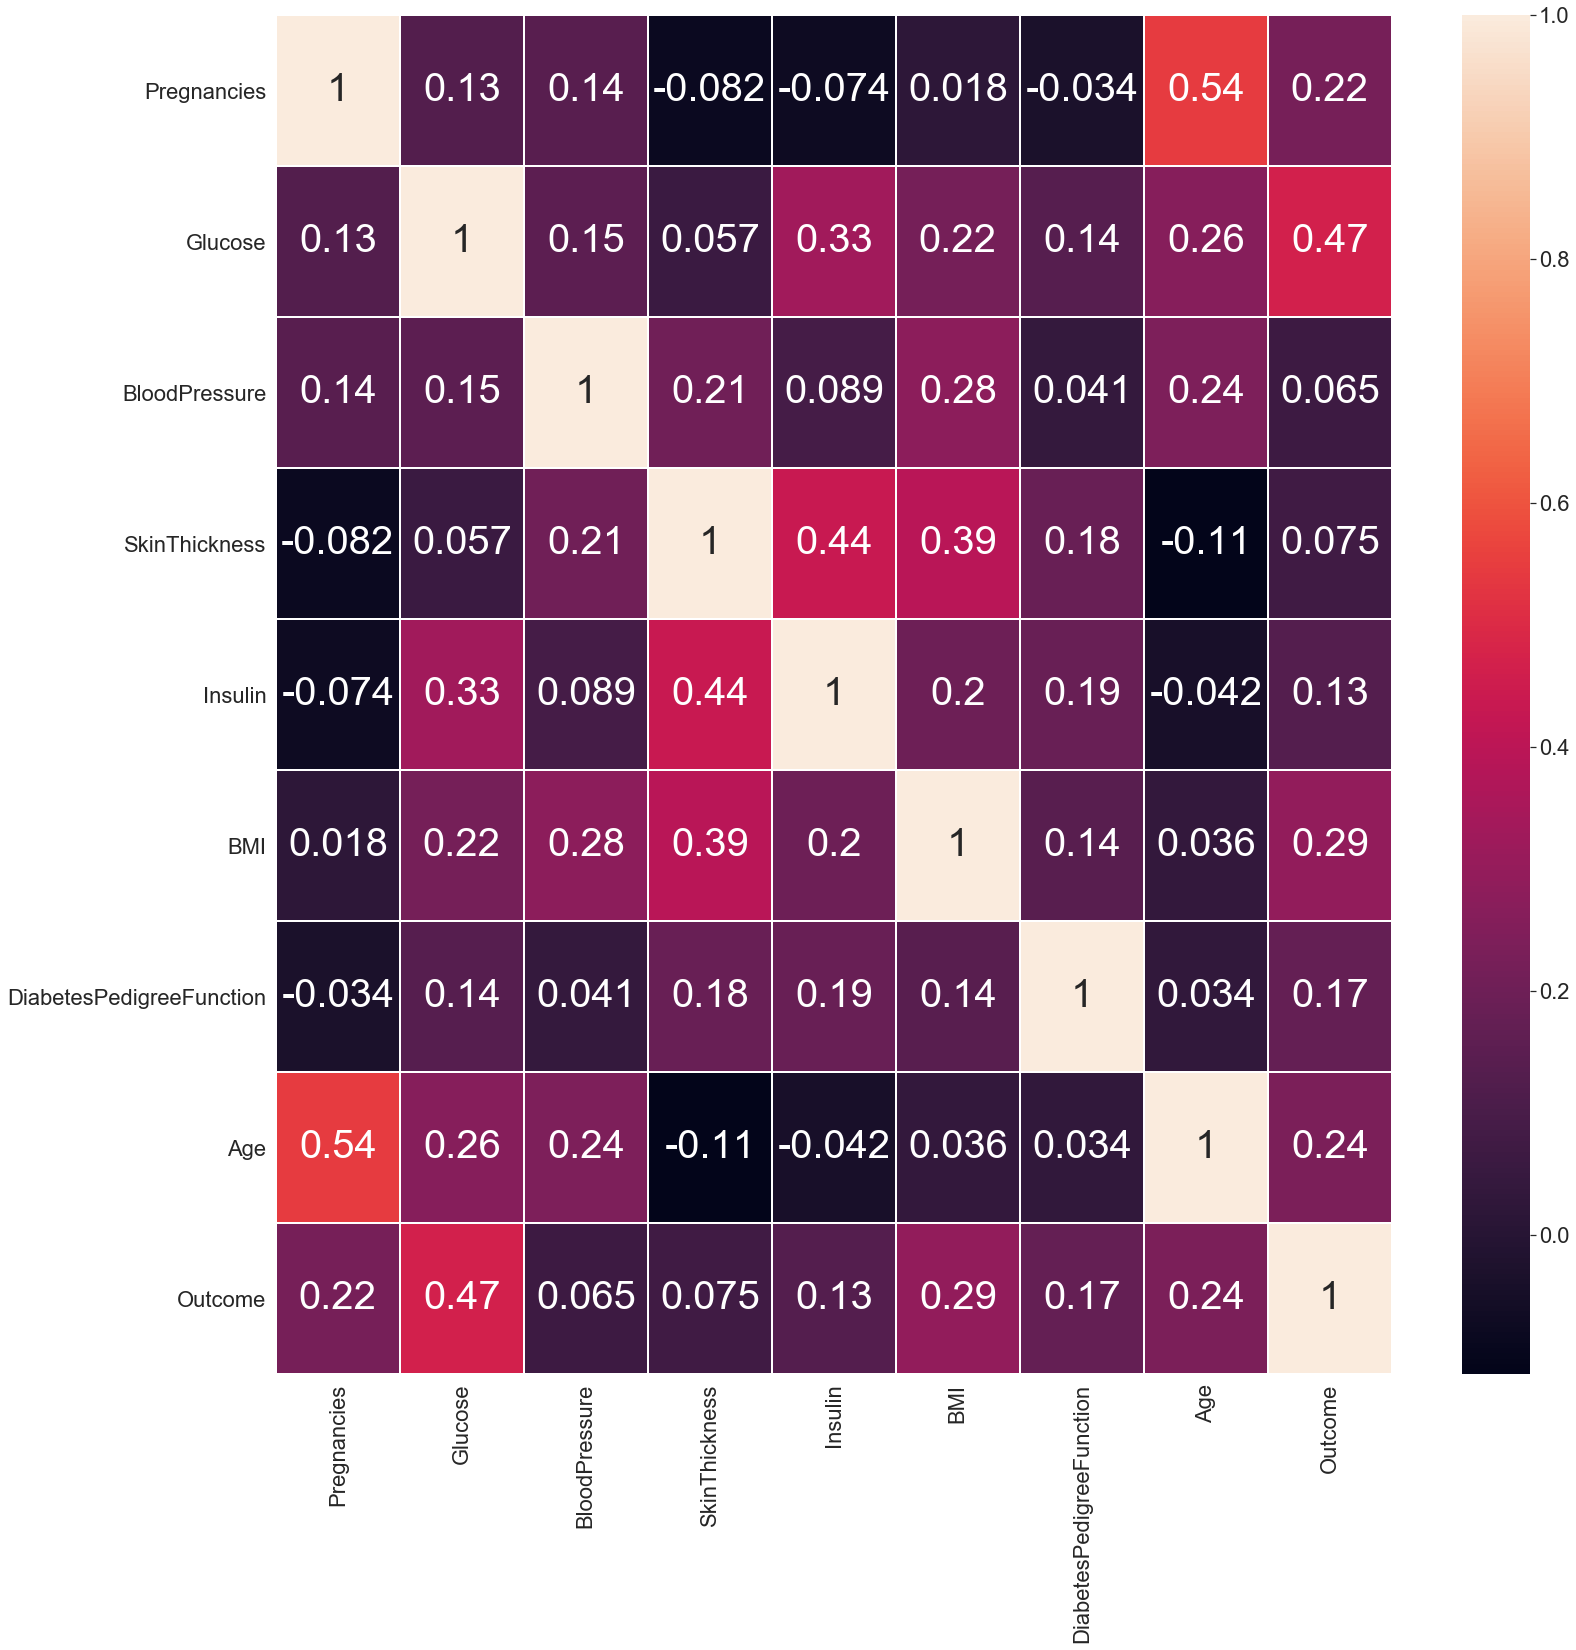

In [30]:
plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True, linewidths=1, annot_kws={"size": 40})
sns.set(font_scale = 2.0)


##### 이상치 처리 
- 각 컬럼별 이상값을 처리 후, 상관관계를 보도록 한다.
- 이상치 처리 <-> 상관 관계 확인
    - 변수 선택 
    - https://freshrimpsushi.tistory.com/821?category=763106

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. 결측치 확인 안됨 
2. 텍스트 타입 없음 
3. 시계열 데이터 없음 

In [4]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### 1. Pregnancies 
    - 4분위 수  
        - 75% 값 = 6, max=17
        - 3시그마 값을 넘어가는 값들이 있는 것처럼 보이므로 확인 필요 
    - 아래 데이터를 보면, 이상치라고 하기에는 어렵다고 판단됨.  

__결론:데이터 정상__

[(0, 111), (1, 135), (2, 103), (3, 75), (4, 68), (5, 57), (6, 50), (7, 45), (8, 38), (9, 28), (10, 24), (11, 11), (12, 9), (13, 10), (14, 2), (15, 1), (17, 1)]


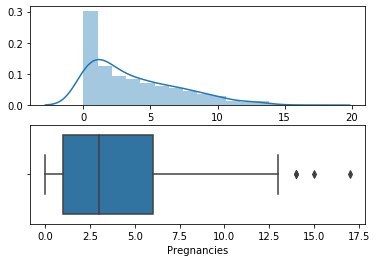

In [6]:
# 임신 분포 확인 
pregnancy = df_train['Pregnancies']
plt.subplot(211)
sns.distplot(pregnancy)
plt.subplot(212)
sns.boxplot(pregnancy)
p_index = pregnancy.value_counts().index.tolist()
p_values = pregnancy.value_counts().values.tolist()
p_list = list(zip(p_index, p_values))
print(sorted(p_list))

In [7]:
print('80분위 :', np.percentile(pregnancy, 80) )
cnt = df_train[pregnancy > np.percentile(pregnancy, 80)]['Pregnancies'].count()
print(cnt / len(pregnancy),'80분위 밖의 수 : ', cnt)

80분위 : 7.0
0.16145833333333334 80분위 밖의 수 :  124


##### 2. Age
    - 81세의 경우, 데이터의 이상치로 분류할 수 있지만, 결과와, 다른 요소들과의 관계를 알아봐야할 것 같음 
    

##### 3. Insulin
    - 좌편향된 분포를 보여주고 있음 
    - 1IQR까지 값이 0.. 미친 것 같음 
    - max 또한 846.. 3시그마에서 벗어나도 엄청 벗어남 

- 분포 분석
    - 80분위 : 150.0
    - 80분위 밖의 숫자 : 153
    - 인슐린 = 0 비율 : 0.4869791666666667    

[(0, 374), (14, 1), (15, 1), (16, 1), (18, 2), (22, 1), (23, 2), (25, 1), (29, 1), (32, 1), (36, 3), (37, 2), (38, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 3), (45, 3), (46, 1), (48, 3), (49, 5), (50, 3), (51, 1), (52, 1), (53, 2), (54, 4), (55, 2), (56, 5), (57, 2), (58, 2), (59, 1), (60, 2), (61, 1), (63, 3), (64, 4), (65, 1), (66, 5), (67, 2), (68, 1), (70, 3), (71, 4), (72, 1), (73, 1), (74, 3), (75, 3), (76, 5), (77, 2), (78, 2), (79, 2), (81, 1), (82, 3), (83, 3), (84, 1), (85, 2), (86, 1), (87, 2), (88, 4), (89, 1), (90, 4), (91, 1), (92, 3), (94, 7), (95, 2), (96, 2), (99, 2), (100, 7), (105, 11), (106, 3), (108, 1), (110, 6), (112, 1), (114, 2), (115, 6), (116, 2), (119, 1), (120, 8), (122, 2), (125, 4), (126, 3), (127, 1), (128, 1), (129, 1), (130, 9), (132, 2), (135, 6), (140, 9), (142, 1), (144, 2), (145, 3), (146, 1), (148, 2), (150, 2), (152, 2), (155, 4), (156, 3), (158, 2), (159, 1), (160, 4), (165, 4), (166, 1), (167, 2), (168, 4), (170, 2), (171, 1), (175, 3), (17

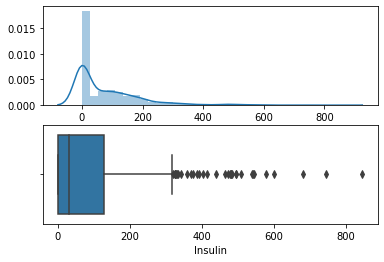

In [8]:
# 인슐린 분포 확인 
insulin = df_train['Insulin']
insulin.value_counts().tolist()
insulin.value_counts().tolist()
plt.subplot(211)
sns.distplot(insulin)
plt.subplot(212)
sns.boxplot(insulin)

i_index = insulin.value_counts().index.tolist()
i_values = insulin.value_counts().values.tolist()
i_list = list(zip(i_index, i_values))
print(sorted(i_list))
print('80분위 :', np.percentile(insulin, 80) )
cnt = df_train[insulin > np.percentile(insulin, 80)]['Insulin'].count()
print('80분위 밖의 숫자 :', cnt)
print('인슐린 없는 초인들 :',len(df_train[insulin == 0]) / len(insulin) )

- 0이 차지하는 비율이 대략 전체 데이터 셋의 반이상 
    - 이 데이터를 어떻게 처리를 해야할까 ?
        - 1) 평균으로 채운다
        - 2) 0을 제외한 데이터와 인슐린과 관계가 있을만한 데이터와의 상관관계를 분석한다
                - 혈당량과 인슐린의 상관관계를 분석 후, 회귀 모형을 구하여 채운다 
                    - 선형회귀로 해보자... 다른 건 할 줄 몰라 힝 
                - 혈당량이 높고 당뇨가 없을 경우 
                    - 인슐린 분비 잘됨 => 당뇨 없고, 인슐린이 평균 이상인 사람들과 혈당량 모델 확인  
                - 혈당량이 낮은 데 당뇨가 있다
                    - 인슐린 분비 고장 => 당뇨 있고, 인슐린이 평균 이하인 사람들과 혈당량 모델 확인
        - 3) 에라 모르겠다, 다 지워. 데이터 다 버려. << 개소리 
                    


3. BMI 
    - min = 0?
    - 몇 개의 이상값을 제외하면 데이터는 정상적인 것 같음 

4. Diabetes Pedigree Function ( 가족력에 따라 당뇨 걸릴 확률 ) 

### 상관관계 확인 및 결측치 처리 
- 정규화 및 표준화
    - http://hleecaster.com/ml-normalization-concept/